In [1]:
from __future__ import absolute_import,print_function,division,unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class Model():
  def __init__(self):
    self.w=tf.Variable(2.0)
    self.b=tf.Variable(1.0)
  def __call__(self,x):
    return self.w*x+self.b

In [11]:
model=Model()

In [12]:
def loss(y_pred,y_true):
  return tf.reduce_mean(tf.square(y_true-y_pred))

In [13]:
True_W=3.0
True_B=2.0
Num=1000
xs=tf.random.normal(shape=[Num])
ys=True_W*(xs)+True_B

In [14]:
def plot_data(inputs,outputs,predicted_outputs):
  real=plt.scatter(inputs,outputs,c='r',marker='.')
  predicted=plt.scatter(inputs,predicted_outputs,c='b',marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()

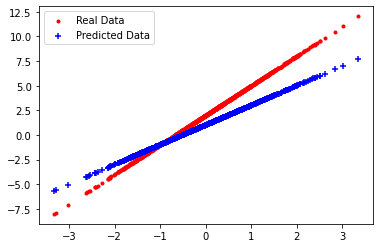

Current loss: 2.067403


In [15]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [16]:
def train(model,inputs,outputs,lr):
  with tf.GradientTape() as t:
    current_loss=loss(model(inputs),outputs)
    dw,db=t.gradient(current_loss,[model.w,model.b])
    model.w.assign_sub(lr*dw)
    model.b.assign_sub(lr*db)
  
  return current_loss

In [35]:
model=Model()
list_w,list_b=[],[]
epochs=range(15)
losses=[]
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss=train(model,xs,ys,0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f'%(epoch,list_w[-1],list_b[-1],current_loss))

Epoch  0: w=2.00 b=1.00, loss=2.06740
Epoch  1: w=2.21 b=1.20, loss=1.30046
Epoch  2: w=2.38 b=1.36, loss=0.81821
Epoch  3: w=2.51 b=1.49, loss=0.51490
Epoch  4: w=2.62 b=1.59, loss=0.32410
Epoch  5: w=2.70 b=1.67, loss=0.20405
Epoch  6: w=2.76 b=1.74, loss=0.12849
Epoch  7: w=2.81 b=1.79, loss=0.08093
Epoch  8: w=2.85 b=1.83, loss=0.05099
Epoch  9: w=2.88 b=1.87, loss=0.03213
Epoch 10: w=2.91 b=1.89, loss=0.02025
Epoch 11: w=2.93 b=1.92, loss=0.01277
Epoch 12: w=2.94 b=1.93, loss=0.00805
Epoch 13: w=2.96 b=1.95, loss=0.00508
Epoch 14: w=2.96 b=1.96, loss=0.00320


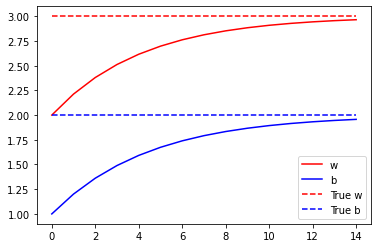

In [39]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([True_W] * len(epochs), 'r--',
      [True_B] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

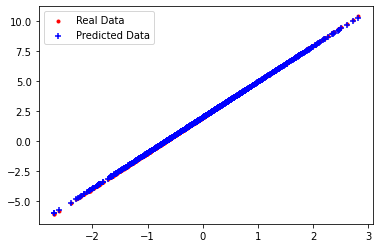

In [40]:
test_inputs  = tf.random.normal(shape=[Num])
test_outputs = test_inputs * True_W + True_B

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

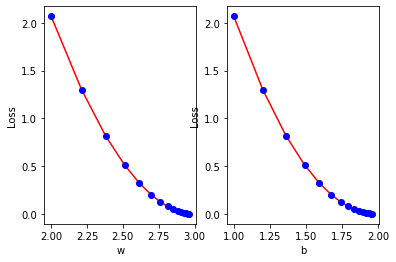

In [41]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')       
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]
plot_loss_for_weights(weights_list, losses)